In [1]:
%matplotlib inline 

In [2]:
import os
origin_dir='E:\个人练习生\skitlearn\image_dataset'
train_dir=os.path.join(origin_dir,'train')
test_dir=os.path.join(origin_dir,'test')
validate_dir=os.path.join(origin_dir,'validate')

In [3]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Using TensorFlow backend.


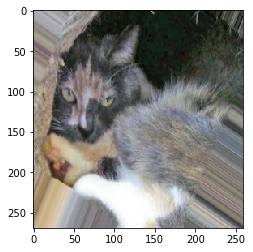

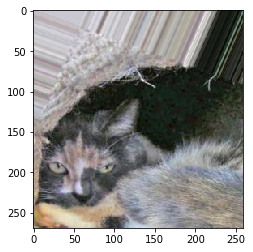

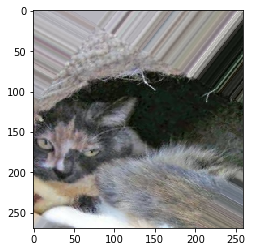

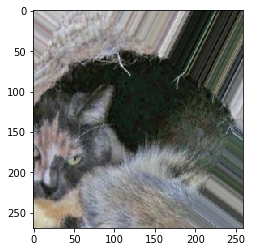

In [4]:
train_cats_dir='E:\个人练习生\skitlearn\image_dataset\\train\cats'
from keras.preprocessing import image
import matplotlib.pyplot as plt
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img=image.load_img(img_path)
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i==4:
        break
plt.show()

In [5]:
from keras import layers,models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [6]:
from keras import losses,optimizers
model.compile(optimizer=optimizers.RMSprop(0.0001),
              loss=losses.binary_crossentropy,
              metrics=['acc'])

In [7]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [10]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1500 images belonging to 2 classes.


In [11]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    validation_data=test_generator,
    validation_steps=50
)

Instructions for updating:
Use tf.cast instead.


Epoch 1/10


 1/50 [..............................] - ETA: 2:41 - loss: 0.6997 - acc: 0.5000

 4/50 [=>............................] - ETA: 38s - loss: 0.6962 - acc: 0.5469 

 7/50 [===>..........................] - ETA: 21s - loss: 0.6909 - acc: 0.5491

10/50 [=====>........................] - ETA: 14s - loss: 0.6919 - acc: 0.5406

13/50 [======>.......................] - ETA: 10s - loss: 0.6905 - acc: 0.5240

15/50 [========>.....................] - ETA: 8s - loss: 0.6920 - acc: 0.5125 

16/50 [========>.....................] - ETA: 8s - loss: 0.6927 - acc: 0.5078

17/50 [=========>....................] - ETA: 7s - loss: 0.6925 - acc: 0.5074

18/50 [=========>....................] - ETA: 7s - loss: 0.6932 - acc: 0.5052

19/50 [==========>...................] - ETA: 6s - loss: 0.6937 - acc: 0.5049

20/50 [===========>..................] - ETA: 6s - loss: 0.6929 - acc: 0.5125

21/50 [===========>..................] - ETA: 6s - loss: 0.6932 - acc: 0.5089

22/50 [============>.................] - ETA: 5s - loss: 0.6936 - acc: 0.5099

23/50 [============>.................] - ETA: 5s - loss: 0.6937 - acc: 0.5109

24/50 [=============>................] - ETA: 5s - loss: 0.6943 - acc: 0.5104

25/50 [==============>...............] - ETA: 4s - loss: 0.6944 - acc: 0.5100

26/50 [==============>...............] - ETA: 4s - loss: 0.6962 - acc: 0.5048

27/50 [===============>..............] - ETA: 4s - loss: 0.6965 - acc: 0.5046

29/50 [================>.............] - ETA: 3s - loss: 0.6960 - acc: 0.5075

30/50 [=================>............] - ETA: 3s - loss: 0.6954 - acc: 0.5125

31/50 [=================>............] - ETA: 3s - loss: 0.6957 - acc: 0.5101

32/50 [==================>...........] - ETA: 3s - loss: 0.6956 - acc: 0.5098

33/50 [==================>...........] - ETA: 3s - loss: 0.6957 - acc: 0.5066

34/50 [===================>..........] - ETA: 2s - loss: 0.6957 - acc: 0.5083

35/50 [====================>.........] - ETA: 2s - loss: 0.6958 - acc: 0.5089

36/50 [====================>.........] - ETA: 2s - loss: 0.6958 - acc: 0.5061

37/50 [=====================>........] - ETA: 2s - loss: 0.6963 - acc: 0.5008

38/50 [=====================>........] - ETA: 2s - loss: 0.6961 - acc: 0.5016

39/50 [======================>.......] - ETA: 1s - loss: 0.6962 - acc: 0.5000

40/50 [=======================>......] - ETA: 1s - loss: 0.6961 - acc: 0.4992

41/50 [=======================>......] - ETA: 1s - loss: 0.6962 - acc: 0.4970

42/50 [========================>.....] - ETA: 1s - loss: 0.6960 - acc: 0.4985

43/50 [========================>.....] - ETA: 1s - loss: 0.6958 - acc: 0.4978

44/50 [=========================>....] - ETA: 0s - loss: 0.6955 - acc: 0.5000

45/50 [==========================>...] - ETA: 0s - loss: 0.6953 - acc: 0.5007

46/50 [==========================>...] - ETA: 0s - loss: 0.6951 - acc: 0.5014

47/50 [===========================>..] - ETA: 0s - loss: 0.6950 - acc: 0.5013

48/50 [===========================>..] - ETA: 0s - loss: 0.6949 - acc: 0.5020

49/50 [============================>.] - ETA: 0s - loss: 0.6951 - acc: 0.5006

50/50 [==============================] - 9s 186ms/step - loss: 0.6946 - acc: 0.5038 - val_loss: 0.7105 - val_acc: 0.3308


Epoch 2/10
 1/50 [..............................] - ETA: 1s - loss: 0.6933 - acc: 0.6250

 4/50 [=>............................] - ETA: 1s - loss: 0.6964 - acc: 0.5625

 7/50 [===>..........................] - ETA: 0s - loss: 0.6971 - acc: 0.5357

10/50 [=====>........................] - ETA: 0s - loss: 0.6966 - acc: 0.5219

12/50 [======>.......................] - ETA: 0s - loss: 0.6966 - acc: 0.5182

13/50 [======>.......................] - ETA: 1s - loss: 0.6958 - acc: 0.5240

14/50 [=======>......................] - ETA: 1s - loss: 0.6949 - acc: 0.5290

15/50 [========>.....................] - ETA: 1s - loss: 0.6950 - acc: 0.5292

16/50 [========>.....................] - ETA: 1s - loss: 0.6958 - acc: 0.5195

17/50 [=========>....................] - ETA: 1s - loss: 0.6954 - acc: 0.5221

18/50 [=========>....................] - ETA: 1s - loss: 0.6957 - acc: 0.5226

19/50 [==========>...................] - ETA: 1s - loss: 0.6958 - acc: 0.5181

20/50 [===========>..................] - ETA: 2s - loss: 0.6955 - acc: 0.5188

21/50 [===========>..................] - ETA: 2s - loss: 0.6952 - acc: 0.5193

22/50 [============>.................] - ETA: 2s - loss: 0.6946 - acc: 0.5227

23/50 [============>.................] - ETA: 2s - loss: 0.6962 - acc: 0.5177

24/50 [=============>................] - ETA: 1s - loss: 0.6956 - acc: 0.5234

25/50 [==============>...............] - ETA: 1s - loss: 0.6950 - acc: 0.5262

26/50 [==============>...............] - ETA: 1s - loss: 0.6955 - acc: 0.5228

27/50 [===============>..............] - ETA: 1s - loss: 0.6953 - acc: 0.5255

28/50 [===============>..............] - ETA: 1s - loss: 0.6953 - acc: 0.5246

29/50 [================>.............] - ETA: 1s - loss: 0.6951 - acc: 0.5269

30/50 [=================>............] - ETA: 1s - loss: 0.6952 - acc: 0.5260

31/50 [=================>............] - ETA: 1s - loss: 0.6950 - acc: 0.5252



32/50 [==================>...........] - ETA: 1s - loss: 0.6951 - acc: 0.5215

33/50 [==================>...........] - ETA: 1s - loss: 0.6947 - acc: 0.5208

34/50 [===================>..........] - ETA: 1s - loss: 0.6951 - acc: 0.5147

35/50 [====================>.........] - ETA: 1s - loss: 0.6946 - acc: 0.5205

36/50 [====================>.........] - ETA: 1s - loss: 0.6946 - acc: 0.5217

37/50 [=====================>........] - ETA: 1s - loss: 0.6948 - acc: 0.5194

38/50 [=====================>........] - ETA: 1s - loss: 0.6952 - acc: 0.5173

39/50 [======================>.......] - ETA: 1s - loss: 0.6955 - acc: 0.5136

40/50 [=======================>......] - ETA: 0s - loss: 0.6953 - acc: 0.5133

41/50 [=======================>......] - ETA: 0s - loss: 0.6953 - acc: 0.5107

42/50 [========================>.....] - ETA: 0s - loss: 0.6952 - acc: 0.5104

43/50 [========================>.....] - ETA: 0s - loss: 0.6951 - acc: 0.5116

44/50 [=========================>....] - ETA: 0s - loss: 0.6949 - acc: 0.5128

45/50 [==========================>...] - ETA: 0s - loss: 0.6947 - acc: 0.5160

46/50 [==========================>...] - ETA: 0s - loss: 0.6947 - acc: 0.5163

47/50 [===========================>..] - ETA: 0s - loss: 0.6950 - acc: 0.5133

48/50 [===========================>..] - ETA: 0s - loss: 0.6948 - acc: 0.5156

49/50 [============================>.] - ETA: 0s - loss: 0.6947 - acc: 0.5159

50/50 [==============================] - 6s 126ms/step - loss: 0.6941 - acc: 0.5175 - val_loss: 0.6610 - val_acc: 0.6548


Epoch 3/10
 1/50 [..............................] - ETA: 1s - loss: 0.7449 - acc: 0.3125

 4/50 [=>............................] - ETA: 1s - loss: 0.7039 - acc: 0.4609

 7/50 [===>..........................] - ETA: 0s - loss: 0.6948 - acc: 0.5089

10/50 [=====>........................] - ETA: 0s - loss: 0.6928 - acc: 0.5219

12/50 [======>.......................] - ETA: 0s - loss: 0.6959 - acc: 0.5104

13/50 [======>.......................] - ETA: 1s - loss: 0.6954 - acc: 0.5120

14/50 [=======>......................] - ETA: 1s - loss: 0.6943 - acc: 0.5179

15/50 [========>.....................] - ETA: 1s - loss: 0.6941 - acc: 0.5146

16/50 [========>.....................] - ETA: 1s - loss: 0.6949 - acc: 0.5098

17/50 [=========>....................] - ETA: 1s - loss: 0.6938 - acc: 0.5184

18/50 [=========>....................] - ETA: 1s - loss: 0.6931 - acc: 0.5191

19/50 [==========>...................] - ETA: 1s - loss: 0.6949 - acc: 0.5099

20/50 [===========>..................] - ETA: 1s - loss: 0.6945 - acc: 0.5141

21/50 [===========>..................] - ETA: 1s - loss: 0.6947 - acc: 0.5104

22/50 [============>.................] - ETA: 1s - loss: 0.6942 - acc: 0.5156

23/50 [============>.................] - ETA: 1s - loss: 0.6930 - acc: 0.5190

24/50 [=============>................] - ETA: 1s - loss: 0.6927 - acc: 0.5208

25/50 [==============>...............] - ETA: 1s - loss: 0.6932 - acc: 0.5150

26/50 [==============>...............] - ETA: 1s - loss: 0.6929 - acc: 0.5180

27/50 [===============>..............] - ETA: 1s - loss: 0.6930 - acc: 0.5185

28/50 [===============>..............] - ETA: 1s - loss: 0.6929 - acc: 0.5167

29/50 [================>.............] - ETA: 1s - loss: 0.6929 - acc: 0.5172

30/50 [=================>............] - ETA: 1s - loss: 0.6930 - acc: 0.5167

31/50 [=================>............] - ETA: 1s - loss: 0.6925 - acc: 0.5202

32/50 [==================>...........] - ETA: 1s - loss: 0.6928 - acc: 0.5176

33/50 [==================>...........] - ETA: 1s - loss: 0.6924 - acc: 0.5161

34/50 [===================>..........] - ETA: 1s - loss: 0.6922 - acc: 0.5165

35/50 [====================>.........] - ETA: 1s - loss: 0.6911 - acc: 0.5205

36/50 [====================>.........] - ETA: 1s - loss: 0.6908 - acc: 0.5217

37/50 [=====================>........] - ETA: 1s - loss: 0.6920 - acc: 0.5177

38/50 [=====================>........] - ETA: 1s - loss: 0.6919 - acc: 0.5197

39/50 [======================>.......] - ETA: 1s - loss: 0.6915 - acc: 0.5184

40/50 [=======================>......] - ETA: 0s - loss: 0.6909 - acc: 0.5195

41/50 [=======================>......] - ETA: 0s - loss: 0.6910 - acc: 0.5206

42/50 [========================>.....] - ETA: 0s - loss: 0.6910 - acc: 0.5193

43/50 [========================>.....] - ETA: 0s - loss: 0.6903 - acc: 0.5225

44/50 [=========================>....] - ETA: 0s - loss: 0.6918 - acc: 0.5185

45/50 [==========================>...] - ETA: 0s - loss: 0.6911 - acc: 0.5222

46/50 [==========================>...] - ETA: 0s - loss: 0.6909 - acc: 0.5238

47/50 [===========================>..] - ETA: 0s - loss: 0.6906 - acc: 0.5259

48/50 [===========================>..] - ETA: 0s - loss: 0.6911 - acc: 0.5221

49/50 [============================>.] - ETA: 0s - loss: 0.6908 - acc: 0.5261

50/50 [==============================] - 6s 128ms/step - loss: 0.6906 - acc: 0.5269 - val_loss: 0.7163 - val_acc: 0.3910


Epoch 4/10
 1/50 [..............................] - ETA: 1s - loss: 0.6806 - acc: 0.4688

 4/50 [=>............................] - ETA: 1s - loss: 0.6808 - acc: 0.5625

 7/50 [===>..........................] - ETA: 0s - loss: 0.6857 - acc: 0.5625

10/50 [=====>........................] - ETA: 0s - loss: 0.6806 - acc: 0.5844

12/50 [======>.......................] - ETA: 1s - loss: 0.6812 - acc: 0.5755

13/50 [======>.......................] - ETA: 1s - loss: 0.6800 - acc: 0.5793

14/50 [=======>......................] - ETA: 1s - loss: 0.6768 - acc: 0.5871

15/50 [========>.....................] - ETA: 1s - loss: 0.6812 - acc: 0.5750

16/50 [========>.....................] - ETA: 1s - loss: 0.6838 - acc: 0.5664

17/50 [=========>....................] - ETA: 1s - loss: 0.6809 - acc: 0.5754

18/50 [=========>....................] - ETA: 1s - loss: 0.6807 - acc: 0.5747

19/50 [==========>...................] - ETA: 1s - loss: 0.6793 - acc: 0.5757

20/50 [===========>..................] - ETA: 2s - loss: 0.6778 - acc: 0.5797

21/50 [===========>..................] - ETA: 2s - loss: 0.6792 - acc: 0.5744

22/50 [============>.................] - ETA: 2s - loss: 0.6801 - acc: 0.5682

23/50 [============>.................] - ETA: 2s - loss: 0.6811 - acc: 0.5679

24/50 [=============>................] - ETA: 1s - loss: 0.6804 - acc: 0.5755

25/50 [==============>...............] - ETA: 1s - loss: 0.6806 - acc: 0.5737

26/50 [==============>...............] - ETA: 1s - loss: 0.6819 - acc: 0.5685

27/50 [===============>..............] - ETA: 1s - loss: 0.6826 - acc: 0.5625

28/50 [===============>..............] - ETA: 1s - loss: 0.6831 - acc: 0.5614

29/50 [================>.............] - ETA: 1s - loss: 0.6828 - acc: 0.5647

30/50 [=================>............] - ETA: 1s - loss: 0.6825 - acc: 0.5656

31/50 [=================>............] - ETA: 1s - loss: 0.6840 - acc: 0.5645

32/50 [==================>...........] - ETA: 1s - loss: 0.6852 - acc: 0.5586

33/50 [==================>...........] - ETA: 1s - loss: 0.6853 - acc: 0.5568

34/50 [===================>..........] - ETA: 1s - loss: 0.6853 - acc: 0.5588

35/50 [====================>.........] - ETA: 1s - loss: 0.6853 - acc: 0.5598



36/50 [====================>.........] - ETA: 1s - loss: 0.6859 - acc: 0.5599

37/50 [=====================>........] - ETA: 1s - loss: 0.6863 - acc: 0.5574

38/50 [=====================>........] - ETA: 1s - loss: 0.6861 - acc: 0.5576

39/50 [======================>.......] - ETA: 1s - loss: 0.6860 - acc: 0.5561

40/50 [=======================>......] - ETA: 0s - loss: 0.6853 - acc: 0.5594

41/50 [=======================>......] - ETA: 0s - loss: 0.6854 - acc: 0.5579

42/50 [========================>.....] - ETA: 0s - loss: 0.6857 - acc: 0.5543

43/50 [========================>.....] - ETA: 0s - loss: 0.6856 - acc: 0.5531

44/50 [=========================>....] - ETA: 0s - loss: 0.6856 - acc: 0.5526

45/50 [==========================>...] - ETA: 0s - loss: 0.6859 - acc: 0.5507

46/50 [==========================>...] - ETA: 0s - loss: 0.6860 - acc: 0.5503

47/50 [===========================>..] - ETA: 0s - loss: 0.6856 - acc: 0.5525

48/50 [===========================>..] - ETA: 0s - loss: 0.6855 - acc: 0.5527

49/50 [============================>.] - ETA: 0s - loss: 0.6852 - acc: 0.5542

50/50 [==============================] - 6s 127ms/step - loss: 0.6851 - acc: 0.5544 - val_loss: 0.7409 - val_acc: 0.3615


Epoch 5/10
 1/50 [..............................] - ETA: 1s - loss: 0.6812 - acc: 0.5938

 4/50 [=>............................] - ETA: 1s - loss: 0.6893 - acc: 0.5156

 7/50 [===>..........................] - ETA: 0s - loss: 0.6915 - acc: 0.5357

10/50 [=====>........................] - ETA: 0s - loss: 0.6916 - acc: 0.5250

13/50 [======>.......................] - ETA: 1s - loss: 0.6914 - acc: 0.5168

14/50 [=======>......................] - ETA: 1s - loss: 0.6924 - acc: 0.5045

15/50 [========>.....................] - ETA: 1s - loss: 0.6913 - acc: 0.5125

16/50 [========>.....................] - ETA: 1s - loss: 0.6901 - acc: 0.5312

17/50 [=========>....................] - ETA: 1s - loss: 0.6888 - acc: 0.5331

18/50 [=========>....................] - ETA: 1s - loss: 0.6885 - acc: 0.5382

19/50 [==========>...................] - ETA: 1s - loss: 0.6880 - acc: 0.5411

20/50 [===========>..................] - ETA: 1s - loss: 0.6895 - acc: 0.5312

21/50 [===========>..................] - ETA: 1s - loss: 0.6888 - acc: 0.5327

22/50 [============>.................] - ETA: 1s - loss: 0.6877 - acc: 0.5384

23/50 [============>.................] - ETA: 1s - loss: 0.6873 - acc: 0.5380

24/50 [=============>................] - ETA: 1s - loss: 0.6867 - acc: 0.5430

25/50 [==============>...............] - ETA: 1s - loss: 0.6855 - acc: 0.5475

26/50 [==============>...............] - ETA: 1s - loss: 0.6852 - acc: 0.5469

27/50 [===============>..............] - ETA: 1s - loss: 0.6849 - acc: 0.5475

28/50 [===============>..............] - ETA: 1s - loss: 0.6842 - acc: 0.5491

29/50 [================>.............] - ETA: 1s - loss: 0.6845 - acc: 0.5474

30/50 [=================>............] - ETA: 1s - loss: 0.6842 - acc: 0.5479

31/50 [=================>............] - ETA: 1s - loss: 0.6844 - acc: 0.5454

32/50 [==================>...........] - ETA: 1s - loss: 0.6853 - acc: 0.5430

33/50 [==================>...........] - ETA: 1s - loss: 0.6852 - acc: 0.5464

34/50 [===================>..........] - ETA: 1s - loss: 0.6848 - acc: 0.5469

35/50 [====================>.........] - ETA: 1s - loss: 0.6854 - acc: 0.5446

36/50 [====================>.........] - ETA: 1s - loss: 0.6836 - acc: 0.5477

37/50 [=====================>........] - ETA: 1s - loss: 0.6821 - acc: 0.5498

38/50 [=====================>........] - ETA: 1s - loss: 0.6833 - acc: 0.5469

39/50 [======================>.......] - ETA: 1s - loss: 0.6837 - acc: 0.5449

40/50 [=======================>......] - ETA: 0s - loss: 0.6841 - acc: 0.5430

41/50 [=======================>......] - ETA: 0s - loss: 0.6838 - acc: 0.5427

42/50 [========================>.....] - ETA: 0s - loss: 0.6829 - acc: 0.5454

43/50 [========================>.....] - ETA: 0s - loss: 0.6820 - acc: 0.5487

44/50 [=========================>....] - ETA: 0s - loss: 0.6825 - acc: 0.5483

45/50 [==========================>...] - ETA: 0s - loss: 0.6825 - acc: 0.5507

46/50 [==========================>...] - ETA: 0s - loss: 0.6827 - acc: 0.5496

47/50 [===========================>..] - ETA: 0s - loss: 0.6825 - acc: 0.5525

48/50 [===========================>..] - ETA: 0s - loss: 0.6826 - acc: 0.5540

49/50 [============================>.] - ETA: 0s - loss: 0.6823 - acc: 0.5548

50/50 [==============================] - 6s 124ms/step - loss: 0.6826 - acc: 0.5519 - val_loss: 0.6792 - val_acc: 0.5464


Epoch 6/10
 1/50 [..............................] - ETA: 1s - loss: 0.6840 - acc: 0.5000

 3/50 [>.............................] - ETA: 3s - loss: 0.6795 - acc: 0.5208

 4/50 [=>............................] - ETA: 3s - loss: 0.6866 - acc: 0.5156

 5/50 [==>...........................] - ETA: 4s - loss: 0.6835 - acc: 0.5375

 6/50 [==>...........................] - ETA: 4s - loss: 0.6845 - acc: 0.5365

 7/50 [===>..........................] - ETA: 4s - loss: 0.6815 - acc: 0.5491

 8/50 [===>..........................] - ETA: 4s - loss: 0.6820 - acc: 0.5469

 9/50 [====>.........................] - ETA: 4s - loss: 0.6801 - acc: 0.5486

10/50 [=====>........................] - ETA: 4s - loss: 0.6802 - acc: 0.5594

11/50 [=====>........................] - ETA: 4s - loss: 0.6750 - acc: 0.5739

12/50 [======>.......................] - ETA: 4s - loss: 0.6733 - acc: 0.5703

13/50 [======>.......................] - ETA: 4s - loss: 0.6726 - acc: 0.5745

14/50 [=======>......................] - ETA: 4s - loss: 0.6700 - acc: 0.5781

15/50 [========>.....................] - ETA: 3s - loss: 0.6749 - acc: 0.5667

16/50 [========>.....................] - ETA: 3s - loss: 0.6723 - acc: 0.5762

17/50 [=========>....................] - ETA: 3s - loss: 0.6790 - acc: 0.5643

18/50 [=========>....................] - ETA: 3s - loss: 0.6773 - acc: 0.5694

19/50 [==========>...................] - ETA: 3s - loss: 0.6756 - acc: 0.5757

20/50 [===========>..................] - ETA: 3s - loss: 0.6767 - acc: 0.5750

21/50 [===========>..................] - ETA: 3s - loss: 0.6752 - acc: 0.5804

22/50 [============>.................] - ETA: 3s - loss: 0.6750 - acc: 0.5824

23/50 [============>.................] - ETA: 3s - loss: 0.6733 - acc: 0.5842

24/50 [=============>................] - ETA: 3s - loss: 0.6730 - acc: 0.5872

25/50 [==============>...............] - ETA: 2s - loss: 0.6720 - acc: 0.5887

26/50 [==============>...............] - ETA: 2s - loss: 0.6740 - acc: 0.5793

27/50 [===============>..............] - ETA: 2s - loss: 0.6734 - acc: 0.5787

28/50 [===============>..............] - ETA: 2s - loss: 0.6743 - acc: 0.5792

29/50 [================>.............] - ETA: 2s - loss: 0.6748 - acc: 0.5787

30/50 [=================>............] - ETA: 2s - loss: 0.6759 - acc: 0.5750

31/50 [=================>............] - ETA: 2s - loss: 0.6757 - acc: 0.5766

32/50 [==================>...........] - ETA: 2s - loss: 0.6763 - acc: 0.5771

33/50 [==================>...........] - ETA: 2s - loss: 0.6783 - acc: 0.5710

34/50 [===================>..........] - ETA: 1s - loss: 0.6788 - acc: 0.5680

35/50 [====================>.........] - ETA: 1s - loss: 0.6791 - acc: 0.5661

36/50 [====================>.........] - ETA: 1s - loss: 0.6801 - acc: 0.5616

37/50 [=====================>........] - ETA: 1s - loss: 0.6804 - acc: 0.5608

38/50 [=====================>........] - ETA: 1s - loss: 0.6803 - acc: 0.5609

39/50 [======================>.......] - ETA: 1s - loss: 0.6808 - acc: 0.5577

40/50 [=======================>......] - ETA: 1s - loss: 0.6805 - acc: 0.5594

41/50 [=======================>......] - ETA: 1s - loss: 0.6806 - acc: 0.5602

42/50 [========================>.....] - ETA: 0s - loss: 0.6796 - acc: 0.5647

43/50 [========================>.....] - ETA: 0s - loss: 0.6805 - acc: 0.5625

44/50 [=========================>....] - ETA: 0s - loss: 0.6798 - acc: 0.5682

45/50 [==========================>...] - ETA: 0s - loss: 0.6797 - acc: 0.5667

46/50 [==========================>...] - ETA: 0s - loss: 0.6799 - acc: 0.5679

47/50 [===========================>..] - ETA: 0s - loss: 0.6796 - acc: 0.5698

48/50 [===========================>..] - ETA: 0s - loss: 0.6788 - acc: 0.5710

49/50 [============================>.] - ETA: 0s - loss: 0.6775 - acc: 0.5733

50/50 [==============================] - 7s 144ms/step - loss: 0.6765 - acc: 0.5756 - val_loss: 0.7180 - val_acc: 0.4712


Epoch 7/10
 1/50 [..............................] - ETA: 1s - loss: 0.6475 - acc: 0.7500

 4/50 [=>............................] - ETA: 1s - loss: 0.6499 - acc: 0.6719

 7/50 [===>..........................] - ETA: 0s - loss: 0.6616 - acc: 0.6339

10/50 [=====>........................] - ETA: 0s - loss: 0.6682 - acc: 0.6062

12/50 [======>.......................] - ETA: 1s - loss: 0.6633 - acc: 0.6250

13/50 [======>.......................] - ETA: 1s - loss: 0.6664 - acc: 0.6202

14/50 [=======>......................] - ETA: 1s - loss: 0.6724 - acc: 0.6071

15/50 [========>.....................] - ETA: 1s - loss: 0.6752 - acc: 0.6000

16/50 [========>.....................] - ETA: 1s - loss: 0.6762 - acc: 0.5977

17/50 [=========>....................] - ETA: 1s - loss: 0.6759 - acc: 0.5919

18/50 [=========>....................] - ETA: 1s - loss: 0.6757 - acc: 0.5903

19/50 [==========>...................] - ETA: 1s - loss: 0.6791 - acc: 0.5822

20/50 [===========>..................] - ETA: 2s - loss: 0.6798 - acc: 0.5797

21/50 [===========>..................] - ETA: 2s - loss: 0.6777 - acc: 0.5818

22/50 [============>.................] - ETA: 2s - loss: 0.6752 - acc: 0.5881

23/50 [============>.................] - ETA: 2s - loss: 0.6767 - acc: 0.5856

24/50 [=============>................] - ETA: 1s - loss: 0.6757 - acc: 0.5911

25/50 [==============>...............] - ETA: 1s - loss: 0.6754 - acc: 0.5913

26/50 [==============>...............] - ETA: 1s - loss: 0.6750 - acc: 0.5865

27/50 [===============>..............] - ETA: 1s - loss: 0.6752 - acc: 0.5845

28/50 [===============>..............] - ETA: 1s - loss: 0.6744 - acc: 0.5859

29/50 [================>.............] - ETA: 1s - loss: 0.6728 - acc: 0.5894

30/50 [=================>............] - ETA: 1s - loss: 0.6744 - acc: 0.5833

31/50 [=================>............] - ETA: 1s - loss: 0.6742 - acc: 0.5867

32/50 [==================>...........] - ETA: 1s - loss: 0.6740 - acc: 0.5889

33/50 [==================>...........] - ETA: 1s - loss: 0.6736 - acc: 0.5881

34/50 [===================>..........] - ETA: 1s - loss: 0.6735 - acc: 0.5919

35/50 [====================>.........] - ETA: 1s - loss: 0.6744 - acc: 0.5920

36/50 [====================>.........] - ETA: 1s - loss: 0.6735 - acc: 0.5911

37/50 [=====================>........] - ETA: 1s - loss: 0.6736 - acc: 0.5904

38/50 [=====================>........] - ETA: 1s - loss: 0.6735 - acc: 0.5905



39/50 [======================>.......] - ETA: 1s - loss: 0.6720 - acc: 0.5962



40/50 [=======================>......] - ETA: 0s - loss: 0.6722 - acc: 0.5953

41/50 [=======================>......] - ETA: 0s - loss: 0.6731 - acc: 0.5930

42/50 [========================>.....] - ETA: 0s - loss: 0.6752 - acc: 0.5885

43/50 [========================>.....] - ETA: 0s - loss: 0.6753 - acc: 0.5879

44/50 [=========================>....] - ETA: 0s - loss: 0.6756 - acc: 0.5881

45/50 [==========================>...] - ETA: 0s - loss: 0.6745 - acc: 0.5910

46/50 [==========================>...] - ETA: 0s - loss: 0.6744 - acc: 0.5897

47/50 [===========================>..] - ETA: 0s - loss: 0.6743 - acc: 0.5891

48/50 [===========================>..] - ETA: 0s - loss: 0.6737 - acc: 0.5892

49/50 [============================>.] - ETA: 0s - loss: 0.6741 - acc: 0.5899

50/50 [==============================] - 6s 127ms/step - loss: 0.6745 - acc: 0.5912 - val_loss: 0.6975 - val_acc: 0.5163


Epoch 8/10
 1/50 [..............................] - ETA: 1s - loss: 0.6445 - acc: 0.7188

 4/50 [=>............................] - ETA: 1s - loss: 0.6545 - acc: 0.6250

 7/50 [===>..........................] - ETA: 1s - loss: 0.6553 - acc: 0.6205

10/50 [=====>........................] - ETA: 0s - loss: 0.6612 - acc: 0.6062

12/50 [======>.......................] - ETA: 1s - loss: 0.6654 - acc: 0.5911

13/50 [======>.......................] - ETA: 1s - loss: 0.6695 - acc: 0.5793

14/50 [=======>......................] - ETA: 1s - loss: 0.6679 - acc: 0.5915

15/50 [========>.....................] - ETA: 1s - loss: 0.6663 - acc: 0.5917

16/50 [========>.....................] - ETA: 1s - loss: 0.6691 - acc: 0.5859

17/50 [=========>....................] - ETA: 1s - loss: 0.6646 - acc: 0.5956

18/50 [=========>....................] - ETA: 2s - loss: 0.6689 - acc: 0.5868

19/50 [==========>...................] - ETA: 2s - loss: 0.6675 - acc: 0.5938

20/50 [===========>..................] - ETA: 2s - loss: 0.6688 - acc: 0.5906

21/50 [===========>..................] - ETA: 2s - loss: 0.6677 - acc: 0.5952

22/50 [============>.................] - ETA: 2s - loss: 0.6696 - acc: 0.5895

23/50 [============>.................] - ETA: 2s - loss: 0.6692 - acc: 0.5910

24/50 [=============>................] - ETA: 2s - loss: 0.6708 - acc: 0.5859

25/50 [==============>...............] - ETA: 2s - loss: 0.6725 - acc: 0.5800

26/50 [==============>...............] - ETA: 1s - loss: 0.6725 - acc: 0.5817

27/50 [===============>..............] - ETA: 1s - loss: 0.6711 - acc: 0.5822

28/50 [===============>..............] - ETA: 1s - loss: 0.6706 - acc: 0.5815

29/50 [================>.............] - ETA: 1s - loss: 0.6696 - acc: 0.5797

30/50 [=================>............] - ETA: 1s - loss: 0.6696 - acc: 0.5792

31/50 [=================>............] - ETA: 1s - loss: 0.6694 - acc: 0.5796

32/50 [==================>...........] - ETA: 1s - loss: 0.6684 - acc: 0.5830

33/50 [==================>...........] - ETA: 1s - loss: 0.6704 - acc: 0.5824

34/50 [===================>..........] - ETA: 1s - loss: 0.6699 - acc: 0.5864

35/50 [====================>.........] - ETA: 1s - loss: 0.6698 - acc: 0.5875

36/50 [====================>.........] - ETA: 1s - loss: 0.6685 - acc: 0.5903

37/50 [=====================>........] - ETA: 1s - loss: 0.6662 - acc: 0.5946

38/50 [=====================>........] - ETA: 1s - loss: 0.6680 - acc: 0.5938

39/50 [======================>.......] - ETA: 1s - loss: 0.6669 - acc: 0.5938

40/50 [=======================>......] - ETA: 0s - loss: 0.6686 - acc: 0.5883

41/50 [=======================>......] - ETA: 0s - loss: 0.6697 - acc: 0.5877

42/50 [========================>.....] - ETA: 0s - loss: 0.6701 - acc: 0.5856

43/50 [========================>.....] - ETA: 0s - loss: 0.6703 - acc: 0.5836

44/50 [=========================>....] - ETA: 0s - loss: 0.6689 - acc: 0.5852

45/50 [==========================>...] - ETA: 0s - loss: 0.6687 - acc: 0.5840

46/50 [==========================>...] - ETA: 0s - loss: 0.6683 - acc: 0.5863

47/50 [===========================>..] - ETA: 0s - loss: 0.6662 - acc: 0.5884

48/50 [===========================>..] - ETA: 0s - loss: 0.6680 - acc: 0.5846

49/50 [============================>.] - ETA: 0s - loss: 0.6682 - acc: 0.5829

50/50 [==============================] - 6s 129ms/step - loss: 0.6680 - acc: 0.5831 - val_loss: 0.6904 - val_acc: 0.5533


Epoch 9/10
 1/50 [..............................] - ETA: 1s - loss: 0.6840 - acc: 0.5312

 4/50 [=>............................] - ETA: 1s - loss: 0.6882 - acc: 0.5469

 7/50 [===>..........................] - ETA: 1s - loss: 0.6785 - acc: 0.5714

10/50 [=====>........................] - ETA: 0s - loss: 0.6801 - acc: 0.5656

12/50 [======>.......................] - ETA: 0s - loss: 0.6741 - acc: 0.5729

13/50 [======>.......................] - ETA: 1s - loss: 0.6715 - acc: 0.5721

14/50 [=======>......................] - ETA: 1s - loss: 0.6665 - acc: 0.5692

15/50 [========>.....................] - ETA: 1s - loss: 0.6650 - acc: 0.5729

16/50 [========>.....................] - ETA: 1s - loss: 0.6685 - acc: 0.5645

17/50 [=========>....................] - ETA: 1s - loss: 0.6687 - acc: 0.5625

18/50 [=========>....................] - ETA: 1s - loss: 0.6683 - acc: 0.5694

19/50 [==========>...................] - ETA: 1s - loss: 0.6690 - acc: 0.5658

20/50 [===========>..................] - ETA: 1s - loss: 0.6690 - acc: 0.5672

21/50 [===========>..................] - ETA: 1s - loss: 0.6689 - acc: 0.5685

22/50 [============>.................] - ETA: 1s - loss: 0.6684 - acc: 0.5724

23/50 [============>.................] - ETA: 1s - loss: 0.6677 - acc: 0.5761

24/50 [=============>................] - ETA: 1s - loss: 0.6684 - acc: 0.5755

25/50 [==============>...............] - ETA: 1s - loss: 0.6697 - acc: 0.5737

26/50 [==============>...............] - ETA: 1s - loss: 0.6695 - acc: 0.5769

27/50 [===============>..............] - ETA: 1s - loss: 0.6683 - acc: 0.5787

28/50 [===============>..............] - ETA: 1s - loss: 0.6689 - acc: 0.5770

29/50 [================>.............] - ETA: 1s - loss: 0.6695 - acc: 0.5765

30/50 [=================>............] - ETA: 1s - loss: 0.6693 - acc: 0.5781

31/50 [=================>............] - ETA: 1s - loss: 0.6701 - acc: 0.5766

32/50 [==================>...........] - ETA: 1s - loss: 0.6704 - acc: 0.5723

33/50 [==================>...........] - ETA: 1s - loss: 0.6707 - acc: 0.5710

34/50 [===================>..........] - ETA: 1s - loss: 0.6721 - acc: 0.5662

35/50 [====================>.........] - ETA: 1s - loss: 0.6723 - acc: 0.5652

36/50 [====================>.........] - ETA: 1s - loss: 0.6721 - acc: 0.5642

37/50 [=====================>........] - ETA: 1s - loss: 0.6709 - acc: 0.5693

38/50 [=====================>........] - ETA: 1s - loss: 0.6705 - acc: 0.5707

39/50 [======================>.......] - ETA: 0s - loss: 0.6699 - acc: 0.5713

40/50 [=======================>......] - ETA: 0s - loss: 0.6690 - acc: 0.5734

41/50 [=======================>......] - ETA: 0s - loss: 0.6683 - acc: 0.5762

42/50 [========================>.....] - ETA: 0s - loss: 0.6674 - acc: 0.5789

43/50 [========================>.....] - ETA: 0s - loss: 0.6662 - acc: 0.5807

44/50 [=========================>....] - ETA: 0s - loss: 0.6658 - acc: 0.5810

45/50 [==========================>...] - ETA: 0s - loss: 0.6659 - acc: 0.5799

46/50 [==========================>...] - ETA: 0s - loss: 0.6657 - acc: 0.5808

47/50 [===========================>..] - ETA: 0s - loss: 0.6652 - acc: 0.5831

48/50 [===========================>..] - ETA: 0s - loss: 0.6645 - acc: 0.5833

49/50 [============================>.] - ETA: 0s - loss: 0.6659 - acc: 0.5816

50/50 [==============================] - 6s 123ms/step - loss: 0.6646 - acc: 0.5850 - val_loss: 0.8284 - val_acc: 0.4060


Epoch 10/10
 1/50 [..............................] - ETA: 1s - loss: 0.6624 - acc: 0.6562

 4/50 [=>............................] - ETA: 1s - loss: 0.6592 - acc: 0.6484

 7/50 [===>..........................] - ETA: 1s - loss: 0.6689 - acc: 0.6116

10/50 [=====>........................] - ETA: 0s - loss: 0.6629 - acc: 0.6188

12/50 [======>.......................] - ETA: 1s - loss: 0.6633 - acc: 0.6146

13/50 [======>.......................] - ETA: 1s - loss: 0.6598 - acc: 0.6202

14/50 [=======>......................] - ETA: 1s - loss: 0.6638 - acc: 0.6094

15/50 [========>.....................] - ETA: 1s - loss: 0.6623 - acc: 0.6125

16/50 [========>.....................] - ETA: 1s - loss: 0.6604 - acc: 0.6172

17/50 [=========>....................] - ETA: 1s - loss: 0.6624 - acc: 0.6158

18/50 [=========>....................] - ETA: 2s - loss: 0.6663 - acc: 0.6042

19/50 [==========>...................] - ETA: 2s - loss: 0.6651 - acc: 0.6069

20/50 [===========>..................] - ETA: 2s - loss: 0.6616 - acc: 0.6156

21/50 [===========>..................] - ETA: 2s - loss: 0.6642 - acc: 0.6116

22/50 [============>.................] - ETA: 2s - loss: 0.6643 - acc: 0.6165

23/50 [============>.................] - ETA: 2s - loss: 0.6641 - acc: 0.6128

24/50 [=============>................] - ETA: 2s - loss: 0.6612 - acc: 0.6146

25/50 [==============>...............] - ETA: 1s - loss: 0.6611 - acc: 0.6138

26/50 [==============>...............] - ETA: 1s - loss: 0.6604 - acc: 0.6142

27/50 [===============>..............] - ETA: 1s - loss: 0.6603 - acc: 0.6157

28/50 [===============>..............] - ETA: 1s - loss: 0.6626 - acc: 0.6127

29/50 [================>.............] - ETA: 1s - loss: 0.6618 - acc: 0.6121

30/50 [=================>............] - ETA: 1s - loss: 0.6616 - acc: 0.6104

31/50 [=================>............] - ETA: 1s - loss: 0.6612 - acc: 0.6089

32/50 [==================>...........] - ETA: 1s - loss: 0.6621 - acc: 0.6045

33/50 [==================>...........] - ETA: 1s - loss: 0.6615 - acc: 0.6042

34/50 [===================>..........] - ETA: 1s - loss: 0.6603 - acc: 0.6066

35/50 [====================>.........] - ETA: 1s - loss: 0.6597 - acc: 0.6089

36/50 [====================>.........] - ETA: 1s - loss: 0.6606 - acc: 0.6068

37/50 [=====================>........] - ETA: 1s - loss: 0.6602 - acc: 0.6064

38/50 [=====================>........] - ETA: 1s - loss: 0.6603 - acc: 0.6069

39/50 [======================>.......] - ETA: 1s - loss: 0.6594 - acc: 0.6082

40/50 [=======================>......] - ETA: 0s - loss: 0.6589 - acc: 0.6094

41/50 [=======================>......] - ETA: 0s - loss: 0.6564 - acc: 0.6143

42/50 [========================>.....] - ETA: 0s - loss: 0.6550 - acc: 0.6168

43/50 [========================>.....] - ETA: 0s - loss: 0.6528 - acc: 0.6185

44/50 [=========================>....] - ETA: 0s - loss: 0.6513 - acc: 0.6229

45/50 [==========================>...] - ETA: 0s - loss: 0.6530 - acc: 0.6194

46/50 [==========================>...] - ETA: 0s - loss: 0.6526 - acc: 0.6196

47/50 [===========================>..] - ETA: 0s - loss: 0.6520 - acc: 0.6190

48/50 [===========================>..] - ETA: 0s - loss: 0.6504 - acc: 0.6224

49/50 [============================>.] - ETA: 0s - loss: 0.6492 - acc: 0.6250

50/50 [==============================] - 6s 124ms/step - loss: 0.6501 - acc: 0.6237 - val_loss: 0.9029 - val_acc: 0.3897


In [12]:
from keras.applications import VGG16
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [14]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [15]:
base_dir='E:\个人练习生\skitlearn\image_dataset'
train_dir=os.path.join(base_dir,'train')
validate_dir=os.path.join(base_dir,'validate')
test_dir=os.path.join(base_dir,'test')

In [16]:
batch_size=20
datagen=ImageDataGenerator(rescale=1./255)

def extract_features(directory,sample_count):
    feature =np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary'
    )
    i=0
    for inputs_batch,labes_batch in generator:
        feature_batch=conv_base.predict(inputs_batch)
        feature[i*batch_size:(i+1)*batch_size]=feature_batch
        labels[i*batch_size:(i+1)*batch_size]=labes_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return feature,labels

In [17]:
train_features,train_lables=extract_features(train_dir,2000)
validate_features,validate_lables=extract_features(validate_dir,1000)
test_features,test_lables=extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.


Found 1000 images belonging to 2 classes.


Found 1500 images belonging to 2 classes.


In [18]:
train_features.shape

(2000, 4, 4, 512)

In [19]:
train_features=np.reshape(train_features,(2000,4*4*512))
validate_features=np.reshape(validate_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

In [20]:
model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_shape=(4*4*512,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(
    optimizer=optimizers.RMSprop(0.00002),
    loss='binary_crossentropy',
    metrics=['acc']
)
train_features.shape

(2000, 8192)

In [22]:
train_lables.shape

(2000,)

In [23]:
history=model.fit(
    train_features,train_lables,
    epochs=10,
    batch_size=20,
    validation_data=(validate_features,validate_features)
)

ValueError: Error when checking target: expected dense_4 to have shape (1,) but got array with shape (8192,)